# Random Forest

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from statistics import mean

In [3]:
# Notebook specific behavior setup
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 10

### Data Prep

In [48]:
# Import Data into respective Dataframes

df_10blue = pd.read_csv("00_LC 10BData.txt", sep="\t", header=None, names=["HMDB ID", "10B-1", "10B-2", "10B-3","10B-4", "10B-5", "10B-6", "10B-7", "10B-8"] )

df_10dark = pd.read_csv("00_LC 10DData.txt", sep="\t", header=None, names=["HMDB ID", "10D-1", "10D-2", "10D-3","10D-4", "10D-5", "10D-6", "10D-7", "10D-8"] )

df_14blue = pd.read_csv("00_LC 14BData.txt", sep="\t", header=None, names=["HMDB ID", "14B-1", "14B-2","14B-4", "14B-5", "14B-6", "14B-7", "14B-8"] )

df_14dark = pd.read_csv("00_LC 14DData.txt", sep="\t", header=None, names=["HMDB ID", "14D-1", "14D-2", "14D-3","14D-4", "14D-5", "14D-6", "14D-7", "14D-8"] )

In [5]:
# This gives me the row to remove from the 14 day dataset that is not in the 10 day dataset
for j in range(0, len(df_14blue)):
    id_to_remove = df_14blue.iloc[:, 0][j]
    if id_to_remove == list(set(df_14blue.iloc[:, 0]) - set(df_10blue.iloc[:, 0]))[0]:
        print(j)

21


In [6]:
# Sanity check to make sure all the IDs are the same before I go to concatenate them
count = 0

for i in range(0, len(df_10blue)):
    for j in range(0, len(df_14blue)-1):
        id_10 = list(df_10blue.iloc[:, 0])[i]
        id_14 = list(df_14blue.drop(21).iloc[:, 0])[j]
        if id_10 == id_14:
            count = count + 1

print(count)

168


In [7]:
# This step is to pull out just the columns with values we want to analyze (aka it "removes" the ID which we will add back at the end)
# and it concatenates the dataframes
ten_blue = df_10blue.iloc[:, 1:9]
ten_dark = df_10dark.iloc[:, 1:9]

fourteen_blue = df_14blue.drop(21).reset_index(drop=True).iloc[:, 1:9]
fourteen_dark = df_14dark.drop(21).reset_index(drop=True).iloc[:, 1:9]

# B=1 D=0
outcome_data = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
outcome = pd.Series(data=outcome_data)

data_missing_outcome = pd.concat([ten_blue, ten_dark, fourteen_blue, fourteen_dark], axis=1).T

data = data_missing_outcome.assign(outcome=outcome.values)
data

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,outcome
10B-1,0.000000,0.000000,0.384315,0.000000,0.000000,0.159936,0.511681,0.161517,0.035253,0.560481,...,0.809183,0.881396,0.722952,0.258091,0.412735,0.594684,0.600782,0.000000,0.086492,1
10B-2,0.430329,0.686895,0.372931,0.190300,0.143212,0.879920,0.863424,0.661988,1.000000,0.705069,...,0.511166,0.491750,0.002381,0.894668,0.705707,0.000000,0.411016,0.652958,0.004168,1
10B-3,0.121270,0.347728,0.294990,0.518018,0.527009,0.457690,0.861510,0.272015,0.427870,0.609246,...,0.840555,0.911721,0.954506,0.616609,0.424122,0.433745,0.820207,0.724513,0.674379,1
10B-4,0.103490,0.515623,0.550316,0.753798,0.768036,1.000000,1.000000,0.462039,0.610348,0.887498,...,0.784911,0.888851,0.829004,0.018523,0.092164,0.149152,0.778144,0.542424,0.532883,1
10B-5,0.937429,0.584672,0.000000,0.255128,0.219775,0.547050,0.796359,1.000000,0.304773,0.000000,...,0.000000,0.050977,0.133966,1.000000,0.796571,0.314951,0.000000,0.683375,0.115301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14D-4,0.110222,0.000000,0.653781,0.579668,0.556469,0.586115,0.433784,0.180329,0.137309,0.889725,...,0.905087,0.949243,0.711157,0.642203,0.472768,0.792126,0.913005,0.449426,0.824898,0
14D-5,1.000000,1.000000,0.262839,0.720852,0.744341,0.824881,0.386867,0.934401,0.426491,0.721568,...,0.000000,0.000000,0.411128,0.432170,1.000000,0.167980,0.610681,0.338205,0.458654,0
14D-6,0.920281,0.866176,0.313162,0.723344,0.740633,1.000000,0.795130,1.000000,0.481774,0.709919,...,0.283617,0.390919,0.407805,0.694902,0.369452,0.232434,0.505342,0.551315,0.300990,0
14D-7,0.812346,0.722678,0.824207,0.241063,0.186010,0.278360,0.550948,0.334093,0.060801,0.000000,...,0.553753,0.547168,0.000000,0.307614,0.430278,0.638673,0.432755,0.000000,0.157866,0


In [8]:
#Descriptive Statistics (10 Day)

ten_blue.describe()
ten_dark.describe()

,10B-1,10B-2,10B-3,10B-4,10B-5,10B-6,10B-7,10B-8
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.348437,0.555544,0.445256,0.454238,0.573815,0.427428,0.544693,0.587697
std,0.314482,0.320241,0.289331,0.303305,0.379204,0.318355,0.238380,0.242529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.073453,0.338028,0.192247,0.180197,0.216381,0.163579,0.380458,0.386346
50%,0.256740,0.517391,0.428455,0.438712,0.679903,0.310110,0.572581,0.585820
75%,0.602842,0.857127,0.678133,0.709846,0.971984,0.702863,0.736184,0.806615
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,10D-1,10D-2,10D-3,10D-4,10D-5,10D-6,10D-7,10D-8
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.542193,0.393911,0.493345,0.605988,0.555452,0.587774,0.491405,0.422359
std,0.347367,0.331705,0.286248,0.231909,0.291745,0.235790,0.301119,0.352790
min,0.000000,0.000000,0.000000,0.016974,0.000000,0.000000,0.000000,0.000000
25%,0.233521,0.119390,0.230010,0.454728,0.297752,0.416837,0.229061,0.110310
50%,0.577360,0.290048,0.479623,0.634810,0.540149,0.587861,0.462442,0.344380
75%,0.855099,0.657522,0.715281,0.779586,0.812446,0.810393,0.754891,0.735486
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Descriptive Statistics (14 day)

fourteen_blue.describe()
fourteen_dark.describe()

,14B-1,14B-2,14B-4,14B-5,14B-6,14B-7,14B-8
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.350102,0.411212,0.544603,0.602896,0.477214,0.520277,0.396225
std,0.332013,0.289422,0.267565,0.305691,0.303634,0.273848,0.317525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068750,0.180908,0.354712,0.331613,0.234331,0.307590,0.142915
50%,0.223038,0.371333,0.528811,0.682372,0.412542,0.550374,0.300786
75%,0.620447,0.597647,0.772760,0.875339,0.739136,0.733592,0.676505
max,1.000000,1.000000,0.963800,1.000000,1.000000,1.000000,1.000000


,14D-1,14D-2,14D-3,14D-4,14D-5,14D-6,14D-7,14D-8
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.597595,0.697498,0.386766,0.431689,0.607030,0.610528,0.528185,0.524593
std,0.314721,0.301234,0.356731,0.310718,0.349599,0.283278,0.322234,0.283541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.329701,0.486892,0.041264,0.162237,0.314685,0.370957,0.259930,0.346622
50%,0.711897,0.803543,0.281379,0.376772,0.692292,0.679460,0.551477,0.534628
75%,0.866288,0.955292,0.704007,0.689524,0.951166,0.866688,0.837789,0.766773
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Random Forest Time

70/30 split

predict blue or dark

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [37]:
# Set up arrays of features and outcomes

labels = np.array(data['outcome'])

features = data.drop('outcome', axis = 1)

feature_list = list(features.columns)

features = np.array(features)

In [38]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state=42, stratify=labels)

In [39]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (21, 168)
Training Labels Shape: (21,)
Testing Features Shape: (10, 168)
Testing Labels Shape: (10,)


In [40]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [41]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [42]:
print('Predictions: ', predictions)
print('Actual:      ', test_labels)
print('Accuracy: ', accuracy_score(predictions, test_labels))
print(classification_report(predictions, test_labels))

Predictions:  [1 1 0 0 0 1 0 0 1 0]
Actual:       [0 1 0 1 0 1 0 0 1 1]
Accuracy:  0.7
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



In [65]:
# Cross Validation F1 Scores

rf_cv_score = cross_val_score(rf, train_features, train_labels, scoring='f1')
rf_cv_score

array([0.8       , 0.8       , 1.        , 0.66666667, 0.66666667])

(array([145.,  15.,   3.,   1.,   0.,   2.,   1.,   1.,   0.,   0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Feature Importances')

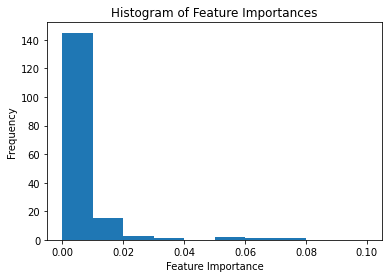

In [74]:
# Histogram of Feature Importance Values - Most (145/168) are not important

importances = rf.feature_importances_

fig, ax = plt.subplots()
ax.hist(importances, range=[0, 0.1])
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Feature Importances')

plt.show()

In [44]:
# Top 5% of the most important features

top_5per_features = sorted(range(len(importances)), key=lambda i: importances[i])[-9:]

df_10blue["HMDB ID"].iloc[top_5per_features]

2        HMDB00056
21       HMDB00267
90     HMDB0000112
30       HMDB00191
161      HMDB01341
12       HMDB00870
76       HMDB00244
97       HMDB00254
38     HMDB0000148
Name: HMDB ID, dtype: object

In [63]:
# Not sure if this is necessary at all but this runs 25 random forests and gives the average metrics
# I thought this might be something useful since our dataset is small but not sure

accuracy_list = []
precision_list = []
f1_score_list = []

rf25 = RandomForestClassifier(n_estimators = 1000, random_state = 42)

for i in range(0, 25):
    train_features_25, test_features_25, train_labels_25, test_labels_25 = train_test_split(features, labels, test_size = 0.3,
                                                                                            random_state=i, stratify=labels)
    
    rf25.fit(train_features_25, train_labels_25)
    
    predictions25 = rf25.predict(test_features_25)
    
    accuracy_list.append(accuracy_score(predictions25, test_labels_25))
    precision_list.append(precision_score(predictions25, test_labels_25))
    f1_score_list.append(f1_score(predictions25, test_labels_25))

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [73]:
print('Average Accuracy: ', mean(accuracy_list))
print('Average Precision: ', mean(precision_list))
print('Average F1 Score: ', mean(f1_score_list))

Average Accuracy:  0.892
Average Precision:  0.832
Average F1 Score:  0.8766464646464647
